# Debug CUDA-MPI code

### Scalar field grid test

Tests `grid<>` class:

+ `grid<>` object creation
+ `.set()` method
+ `.copy_to_gc()` and `.add_to_gc()` methods
+ `.x_shift_left()` method
+ `.kernel3_x()` and `.kernel3_y()` methods
+ `.save()` method

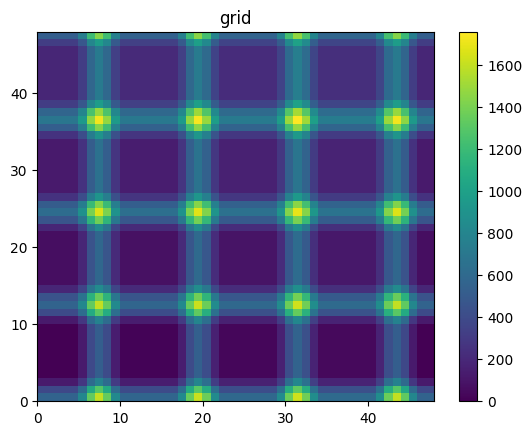

In [9]:

import visxd
visxd.grid( "cuda/cuda.zdf" )

### Vector field grid test

Tests `vec3grid<>` class:

+ Same tests as the `grid<>` class except...
+ `.save()` method for each vector component

In [ ]:
import visxd

visxd.grid("cuda/cuda-vec3-x.zdf" )
visxd.grid("cuda/cuda-vec3-y.zdf" )
visxd.grid("cuda/cuda-vec3-z.zdf" )

### Laser test

Injects a laser pulse and propagates it. Tests:

+ `grid<>::add()` / `vec3grid<>::add()` method
+ Laser pulse injection
+ EMF field solver (no current)
+ EMF `.save()` method
+ Timing code

Plotting EMF/Ex-000731.zdf


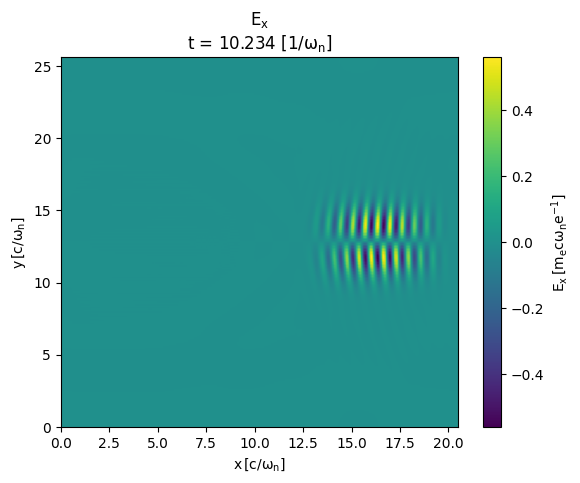

Plotting EMF/Ey-000731.zdf


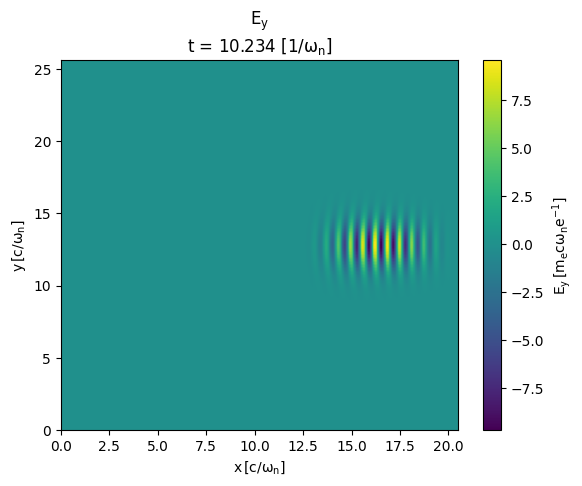

Plotting EMF/Ez-000731.zdf


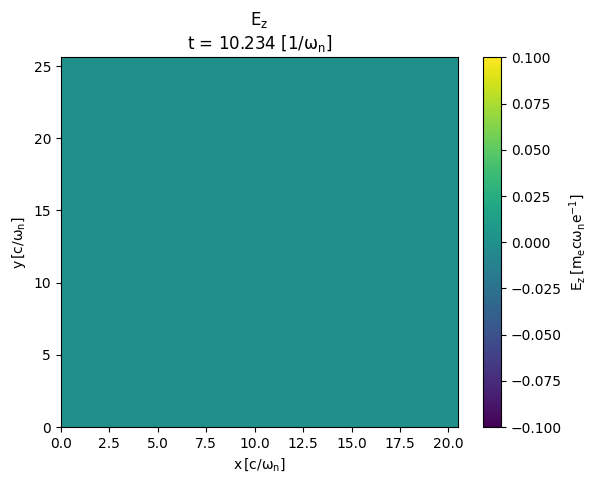

In [1]:
import visxd

# iter = 0
iter = 731

visxd.plot_data("EMF/Ex", iter )
visxd.plot_data("EMF/Ey", iter )
visxd.plot_data("EMF/Ez", iter )


### Injection test

Sets a density profile and injects it. Tests:

+ Species object creation
+ Charge density deposition
+ Saving particle data (positions in simulation units)
+ Injecting a density profile (uniform / step / slab / sphere )
+ Setting a temperature distribution
+ Phasespace diagnostic

Plotting CHARGE/electrons/electrons-charge-000000.zdf


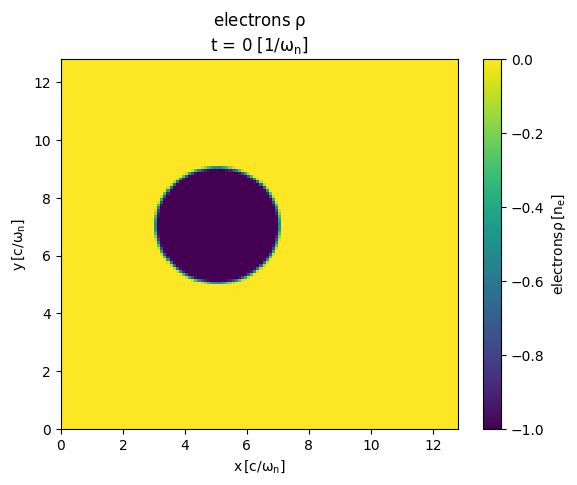

Plotting PARTICLES/electrons/particles-electrons-000000.zdf


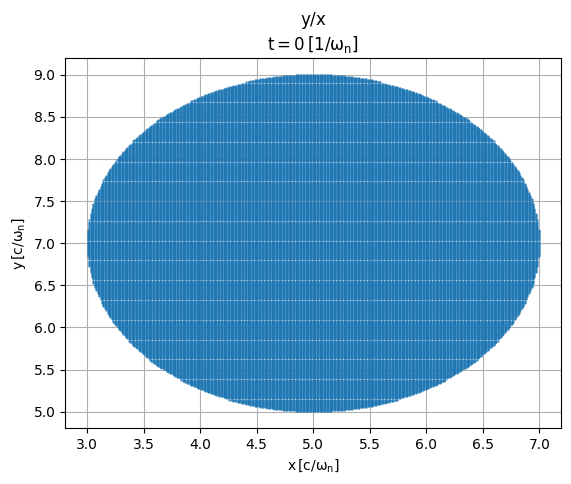

Plotting PARTICLES/electrons/particles-electrons-000000.zdf


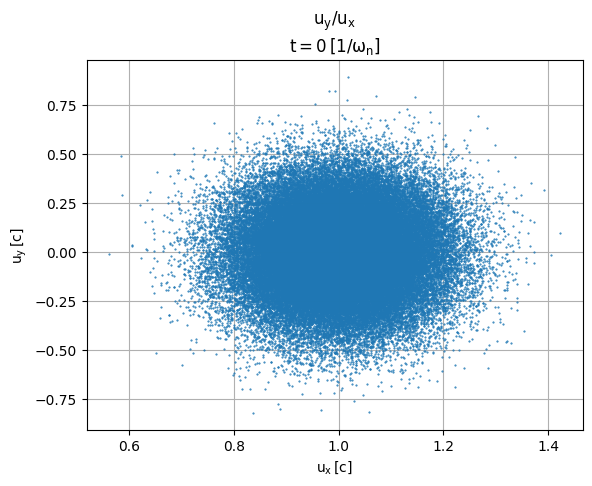

Plotting PHASESPACE/electrons/electrons-uxuz-000000.zdf


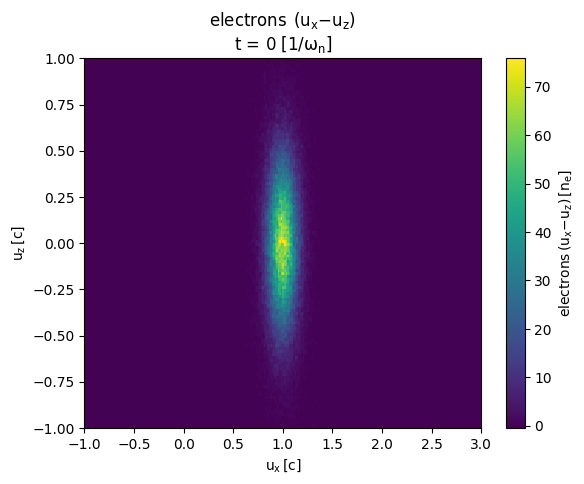

In [17]:
import visxd

visxd.plot_data("CHARGE/electrons/electrons-charge", 0 )
visxd.plot_part("PARTICLES/electrons/particles-electrons", 0 )

visxd.plot_part("PARTICLES/electrons/particles-electrons", 0, qx='ux', qy='uy' )
visxd.plot_data("PHASESPACE/electrons/electrons-uxuz", 0)



### Motion test

Injects a sphere density and moves it for _N_ timesteps. This is performed outside of the simulation, no current is deposited. Tests:

+ `Species::advance()` method
+ `Species::move()` method
+ `Particles::sort()` method

Plotting CHARGE/electrons/electrons-charge-000200.zdf


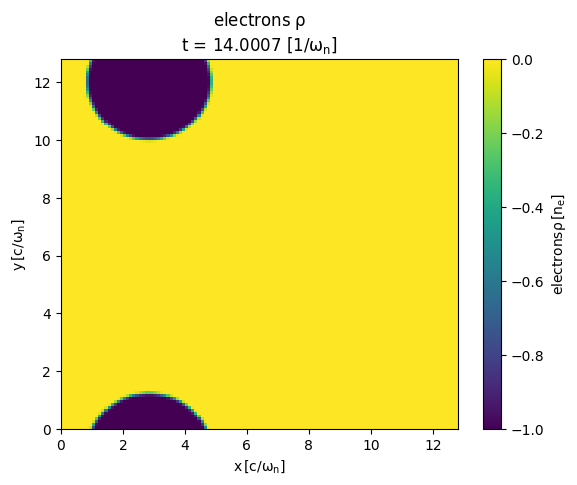

Plotting PARTICLES/electrons/particles-electrons-000200.zdf


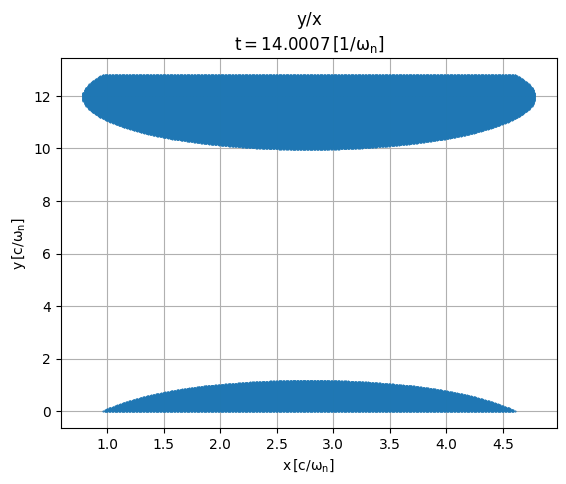

In [4]:
import visxd

# Initial density
# visxd.plot_data("CHARGE/electrons/electrons-charge", 0 )
# visxd.plot_part("PARTICLES/electrons/particles-electrons", 0 )

# Final density and particles
iter = 200 # 200
visxd.plot_data("CHARGE/electrons/electrons-charge", iter )
visxd.plot_part("PARTICLES/electrons/particles-electrons", iter )

### Current deposit test

Runs 1 iteration of the motion test above and deposits current. Tests:

+ `Species::advance( Current )` method
+ Current diagnostic routines

Plotting CURRENT/Jx-000001.zdf


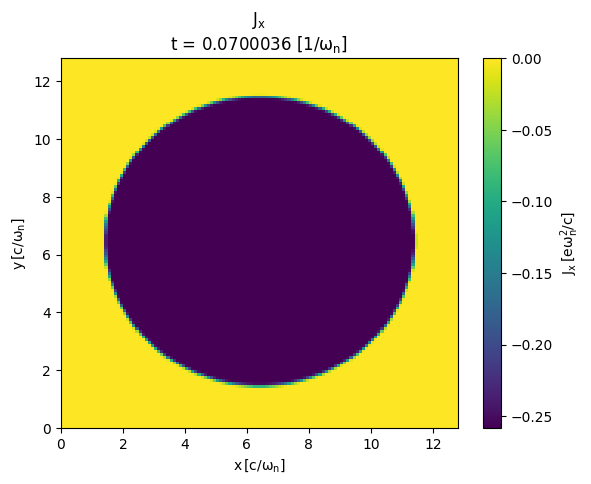

Plotting CURRENT/Jy-000001.zdf


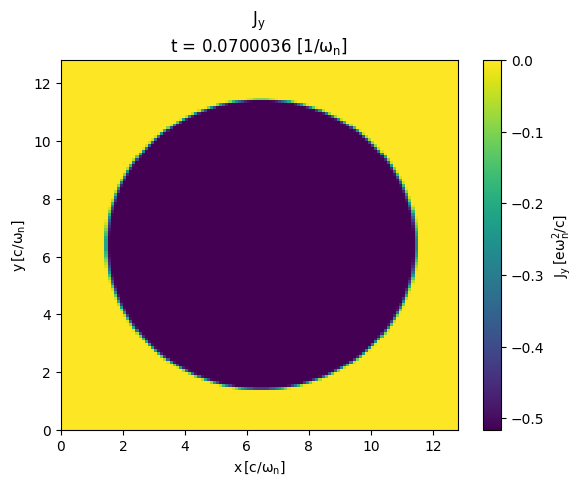

Plotting CURRENT/Jz-000001.zdf


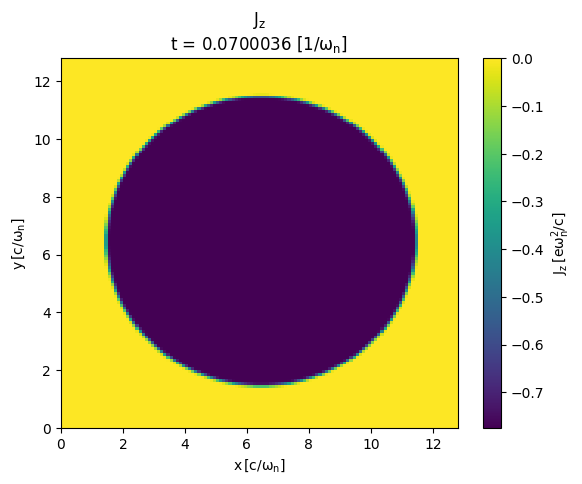

In [46]:
import visxd

iter = 1

visxd.plot_data("CURRENT/Jx", iter )
visxd.plot_data("CURRENT/Jy", iter )
visxd.plot_data("CURRENT/Jz", iter )

## Moving window EMF test

Plotting EMF/Ex-000731.zdf


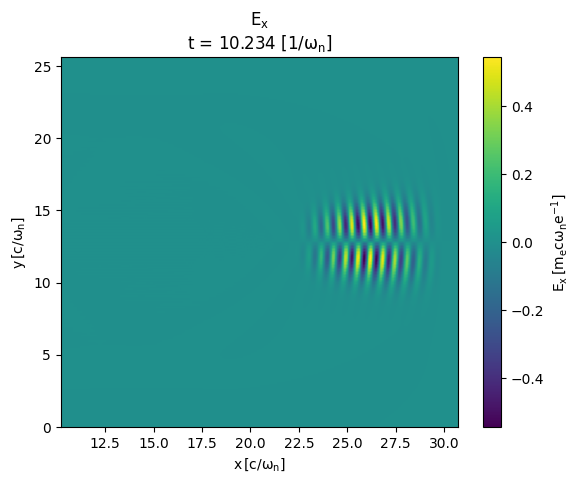

Plotting EMF/Ey-000731.zdf


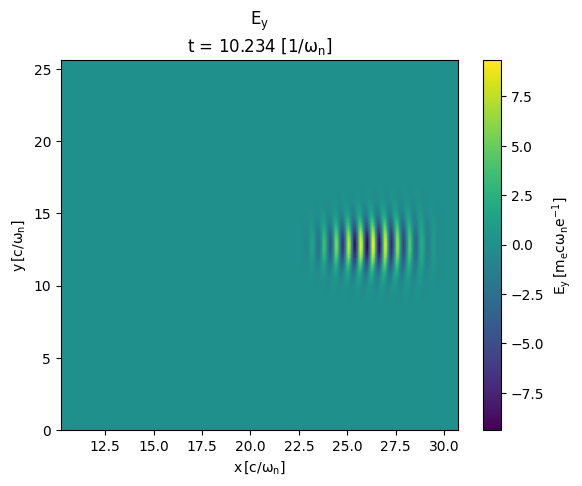

Plotting EMF/Ez-000731.zdf


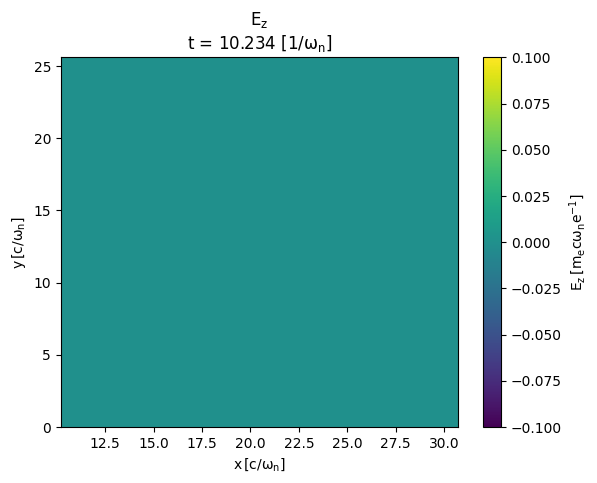

In [15]:
import visxd

iter = 100
iter = 731

# iter = 731
# iter = 1462

visxd.plot_data("EMF/Ex", iter )
visxd.plot_data("EMF/Ey", iter )
visxd.plot_data("EMF/Ez", iter )

## Moving window Particle injection test

Plotting CHARGE/electrons/electrons-charge-000700.zdf


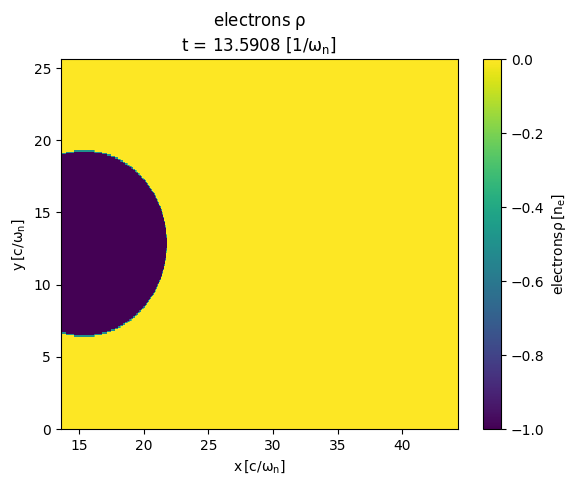

In [10]:
# iter = 0
# iter = 1000

iter = 700


visxd.plot_data("CHARGE/electrons/electrons-charge", iter )

## LWFA Test

Plotting CHARGE/electrons/electrons-charge-002300.zdf


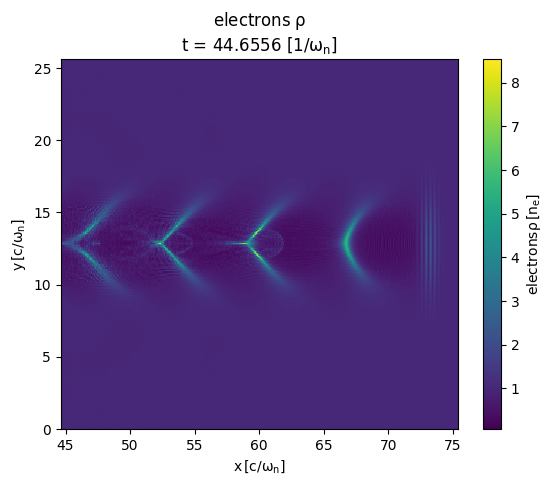

Plotting EMF/Ex-002300.zdf


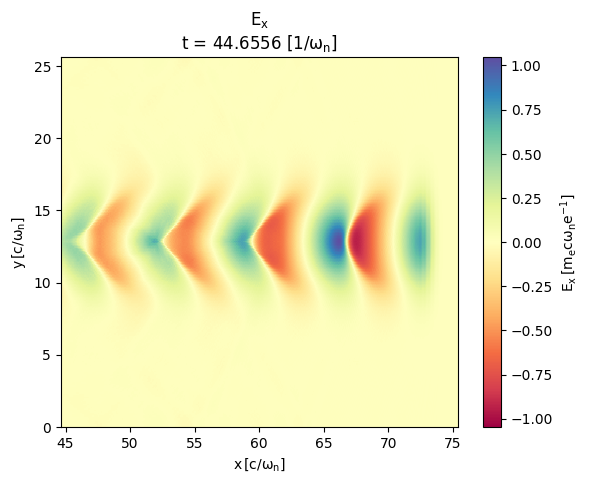

Plotting EMF/Ey-002300.zdf


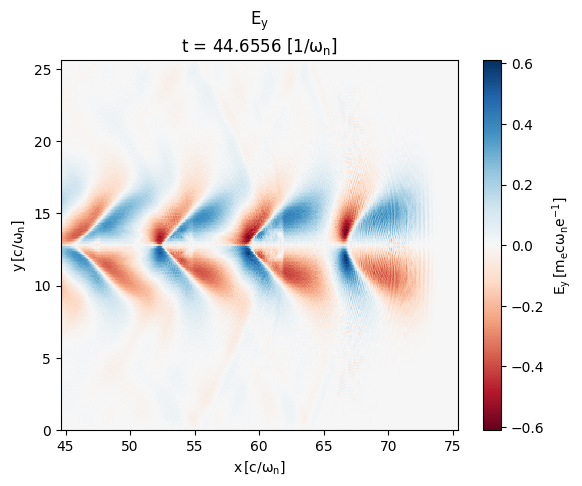

Plotting EMF/Ez-002300.zdf


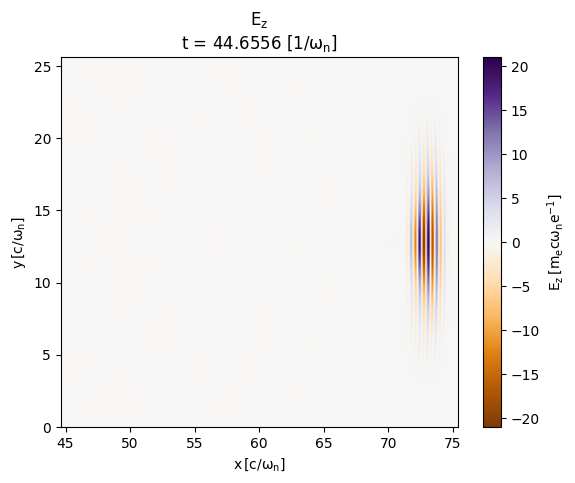

Plotting CURRENT/Jy-002300.zdf


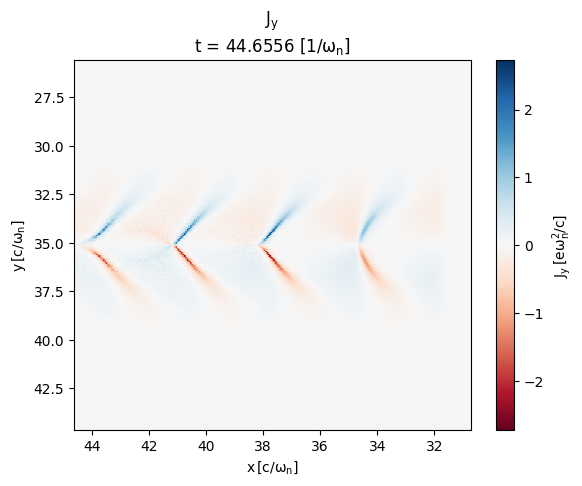

In [18]:
import visxd

# iter = 1600

iter = 2300

visxd.plot_data("CHARGE/electrons/electrons-charge", iter,
                scale = [ -1, 0 ] )

visxd.plot_data("EMF/Ex", iter, cmap = "Spectral", vsim = True )
visxd.plot_data("EMF/Ey", iter, cmap = "RdBu", vsim = True)
visxd.plot_data("EMF/Ez", iter, cmap = "PuOr", vsim = True )

visxd.plot_data("CURRENT/Jy", iter, cmap = "RdBu", vsim = True )